**Project title:Google Search Analysis**

In [ ]:
#Importing libraries
!pip install pytrends
import pandas as pd
from pytrends.request import TrendReq
import time  # Import the time module

# Initialize Pytrends
pytrends = TrendReq(hl='en-US', tz=360)

# Define the keywords
keywords = ['Data Science',"Data Analysis","Machine Learning","Cloud Computing"]

# Fetch data for smaller time chunks (2004-2010, 2011-2015, etc.)
timeframes = ['2004-01-01 2010-12-31', '2011-01-01 2015-12-31', '2016-01-01 2020-12-31', '2021-01-01 2024-12-31']

# Store data in a list to combine later
all_trends_data = []

for timeframe in timeframes:
    # Build the payload
    pytrends.build_payload(keywords, cat=0, timeframe=timeframe, geo='', gprop='')

    # Get interest over time for the specified period
    trends_data = pytrends.interest_over_time()

    # Append the data to the list
    all_trends_data.append(trends_data)

    # Pause for a few seconds to avoid exceeding the rate limit
    time.sleep(5) # Wait for 5 seconds before the next request

# Concatenate the data for all periods into one DataFrame
combined_trends_data = pd.concat(all_trends_data)

# Save the combined data to a CSV file
combined_trends_data.to_csv('google_trends_data_2004_2024_combined.csv')

print("Data saved successfully!")

/usr/local/lib/python3.10/dist-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


Data saved successfully!


In [ ]:
!pip install ydata-profiling


**EDA** **/ Data visualization**

In [ ]:
import pandas_profiling as pp


<ipython-input-17-4afb823491c5>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


In [ ]:
df=pd.read_csv('/content/google_trends_data_2004_2024_combined.csv')

In [ ]:
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**Analysis for google trend on Data analysis**

Enter the search term for Google Trends: data analyst


/usr/local/lib/python3.10/dist-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


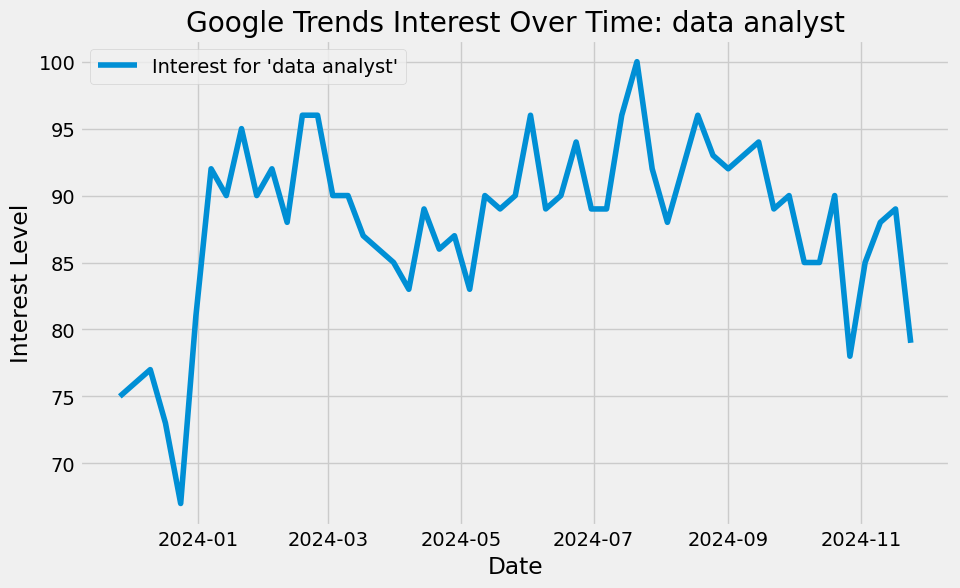

In [ ]:
import time

# Function to get trends data with user input
def get_trends_data(query):
    pytrends.build_payload([query], cat=0, timeframe='today 12-m', geo='', gprop='')

    try:
        interest_over_time = pytrends.interest_over_time()
        if not interest_over_time.empty:
            return interest_over_time
        else:
            print(f"No data found for query: {query}")
            return None
    except TooManyRequestsError:
        print("Too many requests. Please wait for a while.")
        return None

# Take user input
query = input("Enter the search term for Google Trends: ")

# Retrieve data
interest_over_time = get_trends_data(query)

# Display plot if data is found
if interest_over_time is not None:
    plt.figure(figsize=(10, 6))
    plt.plot(interest_over_time.index, interest_over_time[query], label=f"Interest for '{query}'")
    plt.title(f"Google Trends Interest Over Time: {query}")
    plt.xlabel("Date")
    plt.ylabel("Interest Level")
    plt.legend()
    plt.grid(True)
    plt.show()


In [ ]:
import pandas as pd
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
import time

Trending_topics = TrendReq(hl='en-US', tz=360)

In [ ]:
kw_list=["Cloud Computing"]
Trending_topics.build_payload(kw_list,cat=0, timeframe='today 12-m')
time.sleep(5)

In [ ]:
data = Trending_topics.interest_over_time()

/usr/local/lib/python3.10/dist-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


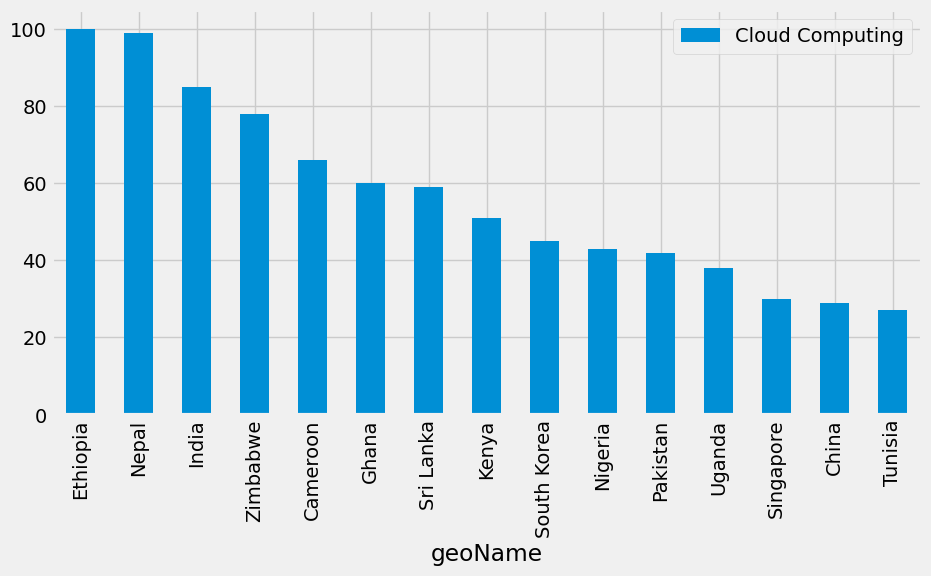

In [ ]:
import matplotlib.pyplot as plt

# Assuming the data is already sorted and top 10 countries are selected
df = data.head(15)
df = df.reset_index()

# Plotting
df.plot(x='geoName', y='Cloud Computing', figsize=(10, 5), kind="bar")

# Applying the style
plt.style.use('fivethirtyeight')

# Display the plot
plt.show()


This code retrieves a regional breakdown of interest for the "Cloud Computing" keyword, sorts the regions by interest in descending order, and then displays the top 10 regions with the highest search interest in "Cloud Computing."

In [ ]:
data = Trending_topics.interest_by_region()
data= data.sort_values(by="Cloud Computing",
                        ascending = False)
df = data.head(10)
print(df)

             Cloud Computing
geoName                     
Ethiopia                 100
Nepal                     99
India                     85
Zimbabwe                  78
Cameroon                  66
Ghana                     60
Sri Lanka                 59
Kenya                     51
South Korea               45
Nigeria                   43


Related Queries

Whenever a user searches for something about a particular topic on Google there is a high probability that the user will search for more queries related to the same topic. These are known as related queries. Let us find a list of related queries for “Cloud Computing”.

In [ ]:
try:
    Trending_topics.build_payload(kw_list=['Cloud Computing'])
    related_queries = Trending_topics.related_queries()
    related_queries.values()
except (KeyError, IndexError):
    print("No related queries found for 'Cloud Computing'")

No related queries found for 'Cloud Computing'


Top Charts

Using this method, we can get the top trending searches yearly. So, let us check what were the searches trending in the year 2021.

In [ ]:
df = Trending_topics.top_charts(2023, hl='en-US',
                                tz=300, geo='GLOBAL') # it show the trend on 2023 in global
df.head(10)

,title,exploreQuery
0,War in Israel and Gaza,Israel Gaza
1,Titanic submarine,
2,Turkey earthquake,
3,Hurricane Hilary,
4,Hurricane Idalia,
5,Hurricane Lee,
6,Maine shooting,
7,Nashville shooting,
8,Chandrayaan-3,Chandrayaan 3
9,War in Sudan,Sudan


In [ ]:
!pip install pytrends
import time
from pytrends.request import TrendReq
from pytrends import exceptions

# Initialize Pytrends
pytrends = TrendReq(hl='en-US', tz=360)

# Define the keywords (for example, 'Python programming', 'Data Science')
keywords = ['Python programming', 'Data Science', 'Machine Learning','Data Analysis']

# Build the payload (specifying timeframe from 2004 to 2024)
pytrends.build_payload(keywords, cat=0, timeframe='2004-01-01 2024-12-31', geo='', gprop='')

# Implement a delay mechanism to avoid exceeding the rate limit
time.sleep(5) # Wait for 5 seconds before making the request

try:
    # Get interest over time data for the specified keywords
    trends_data = pytrends.interest_over_time()
except exceptions.TooManyRequestsError:
    print("Too many requests. Waiting for a longer period...")
    time.sleep(60)  # Wait for 60 seconds before retrying
    trends_data = pytrends.interest_over_time()  # Retry the request

# Check the data (optional)
print(trends_data.head())

# Save the data to a CSV file
trends_data.to_csv('google_trends_data_2004_2024.csv')

print("Data has been saved to 'google_trends_data_2004_2024.csv'")

Too many requests. Waiting for a longer period...
            Python programming  Data Science  Machine Learning  Data Analysis  \
date                                                                            
2004-01-01                   8             7                13             39   
2004-02-01                   8             7                13             43   
2004-03-01                   7             6                14             45   
2004-04-01                   6             5                14             46   
2004-05-01                   6             4                14             39   

            isPartial  
date                   
2004-01-01      False  
2004-02-01      False  
2004-03-01      False  
2004-04-01      False  
2004-05-01      False  
Data has been saved to 'google_trends_data_2004_2024.csv'


/usr/local/lib/python3.10/dist-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


/usr/local/lib/python3.10/dist-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


            Data analysis  Data Science  Machine learning  Python programming  \
date                                                                            
2004-01-01             21             4                 7                   4   
2004-02-01             23             4                 7                   4   
2004-03-01             24             3                 7                   4   
2004-04-01             25             3                 8                   3   
2004-05-01             21             2                 8                   3   
...                   ...           ...               ...                 ...   
2024-07-01             22            43                46                   7   
2024-08-01             22            42                44                   7   
2024-09-01             25            44                47                   8   
2024-10-01             26            40                50                   7   
2024-11-01             26   

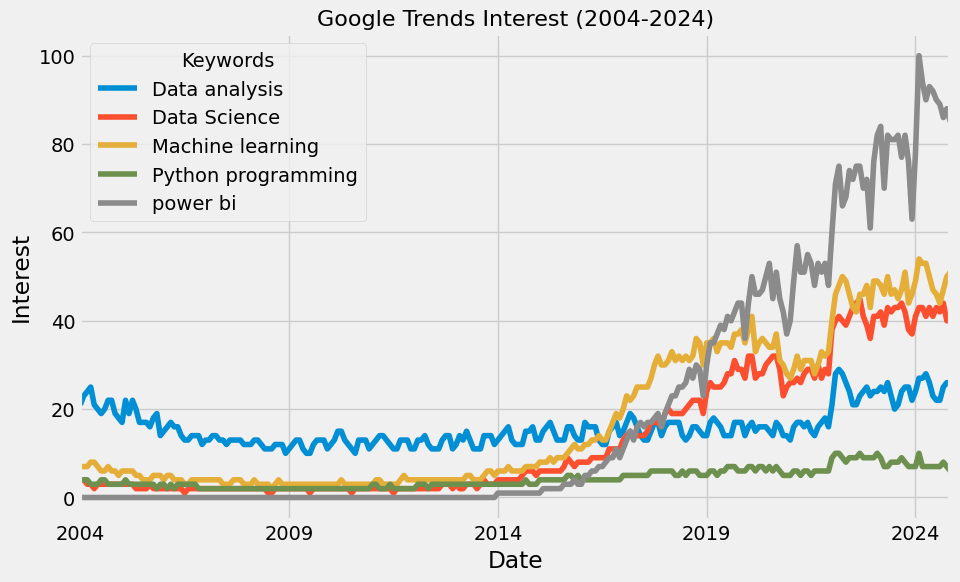

IndexError: list index out of range

In [ ]:
from pytrends.request import TrendReq
import matplotlib.pyplot as plt

# Initialize Pytrends
pytrends = TrendReq(hl='en-US', tz=360)

# Define the keywords you're interested in, including 'Python programming'
keywords = ['Data analysis', 'Data Science','Machine learning', 'Python programming',"power bi"]

# Build the payload for the time period 2020-2024
pytrends.build_payload(keywords, cat=0, timeframe='2004-01-01 2024-12-31', geo='', gprop='')

# Get the interest over time for the specified keywords
trends_data = pytrends.interest_over_time()

# Check if there's any missing data (e.g., if the date range includes future dates)
print(trends_data)

# Plot the trends over time
trends_data.plot(figsize=(10, 6))
plt.title('Google Trends Interest (2004-2024)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Interest')
plt.legend(title='Keywords')
plt.show()

# Get related queries
related_queries = pytrends.related_queries()

# Check if 'Python programming' is in the related queries before accessing it
if 'Python programming' in related_queries:
    print(related_queries['Python programming'])
else:
    print("No related queries found for 'Python programming'")

The suggestions() method, will help you to explore what the world is searching for. It returns a list of additional suggested keywords that can be used to filter a trending search on Google.

In [ ]:
keywords = Trending_topics.suggestions(
  keyword='Cloud Computing')
df = pd.DataFrame(keywords)
df.drop(columns= 'mid')